In [32]:
import numpy as np
import pandas as pd 
import matplotlib
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv("train.csv")
#print(data.head())

In [34]:
data=np.array(data)
m,n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
y_dev = data_dev[0]
x_dev = data_dev[1:n]

data_train = data[10000:m].T
y_train = data_train[0]
x_train = data_train[1:n]


In [38]:
def init_params():
    w1 = np.random.randn(10, 784) - 0.5
    b1 = np.random.randn(10, 1) - 0.5
    w2 = np.random.randn(10, 10) - 0.5
    b2 = np.random.randn(10, 1) - 0.5
    return w1, b1, w2, b2


def ReLU(z):
    return np.maximum(0, z)

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0))  
    return exp_z / np.sum(exp_z, axis=0)


data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
y_dev = data_dev[0]
x_dev = data_dev[1:n]

data_train = data[1000:m].T  
y_train = data_train[0]
x_train = data_train[1:n]

def forward_prop(w1, b1, w2, b2, x):
    z1 = w1.dot(x) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

def one_hot(y):
    one_hot_y = np.zeros((y.size, y.max() + 1))
    one_hot_y[np.arange(y.size), y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y

def derivative_ReLU(z):
    return z > 0

def back_prop(z1, a1, z2, a2, w2, x, y):
    m = y.size  
    one_hot_y = one_hot(y)
    dz2 = a2 - one_hot_y
    dw2 = 1 / m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2, axis=1, keepdims=True) 
    dz1 = w2.T.dot(dz2) * derivative_ReLU(z1)
    dw1 = 1 / m * dz1.dot(x.T)
    db1 = 1 / m * np.sum(dz1, axis=1, keepdims=True)  
    return dw1, db1, dw2, db2

def update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, a):
    w1 -= a * dw1
    b1 -= a * db1  
    w2 -= a * dw2
    b2 -= a * db2
    return w1, b1, w2, b2

def get_predictions(a2):
    return np.argmax(a2, axis=0)

def get_accuracy(predictions, y):
    return np.sum(predictions == y) / y.size

def gradient_descent(x, y, itr, a):
    w1, b1, w2, b2 = init_params()
    for i in range(itr):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, x)
        dw1, db1, dw2, db2 = back_prop(z1, a1, z2, a2, w2, x, y)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dw1, db1, dw2, db2, a)
        if i % 50 == 0:
            print("Iteration:", i)
            print(f"Accuracy: {get_accuracy(get_predictions(a2), y)}")
    return w1, b1, w2, b2


In [44]:
w1, b1, w2, b2 = gradient_descent(x_train, y_train, 500, 0.1)

Iteration: 0
Accuracy: 0.0995609756097561
Iteration: 50
Accuracy: 0.0995609756097561
Iteration: 100
Accuracy: 0.0995609756097561
Iteration: 150
Accuracy: 0.0995609756097561
Iteration: 200
Accuracy: 0.11187804878048781
Iteration: 250
Accuracy: 0.11187804878048781
Iteration: 300
Accuracy: 0.11187804878048781
Iteration: 350
Accuracy: 0.11187804878048781
Iteration: 400
Accuracy: 0.11187804878048781
Iteration: 450
Accuracy: 0.11187804878048781


Prediction: [1]
Label: 1


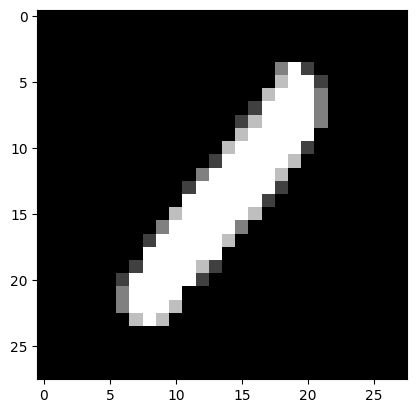

In [78]:

def make_predictions(x, w1, b1, w2, b2):
    _, _, _, a2 = forward_prop(w1, b1, w2, b2, x)
    predictions = get_predictions(a2)
    return predictions

def test_predictions(index, w1, b1, w2, b2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], w1, b1, w2, b2)
    label = y_train[index]
    print(f"Prediction: {prediction}")
    print(f"Label: {label}")

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

# Test with a sample index
test_predictions(5, w1, b1, w2, b2)